# CODE (Lecture 12) - 18 January / 2022

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from mpl_toolkits import mplot3d
from scipy.integrate import solve_ivp
import networkx as nx
import math
import random
import collections
from numpy import linalg as la

%matplotlib inline
%config InlineBackend.figure_format = 'retina'



### Integrators

In [2]:
def rk4s(f,h,x,**kwargs): # RK4 single iteration
    k1 = h*f(x,**kwargs)
    k2 = h*f(x+0.5*k1,**kwargs)
    k3 = h*f(x+0.5*k2,**kwargs)
    k4 = h*f(x+k3,**kwargs)
    x += (k1+2*k2+2*k3+k4)/6
    return x 

def rk5s(dynamics,t,x,**kwargs): # RK5 single iteration
    k1 = h*dynamics(t,x,**kwargs)
    k2 = h*dynamics(t,x+k1/4,**kwargs)
    k3 = h*dynamics(t,x+3*k1/32+9*k2/32,**kwargs)
    k4 = h*dynamics(t,x+1932*k1/2197-7200*k2/2197+7296*k3/2197,**kwargs)
    k5 = h*dynamics(t,x+439*k1/216-8*k2+3680*k3/513-845*k4/4104,**kwargs)
    x += 25*k1/216+1408*k3/2565+2197*k4/4104-k5/5
    return x

### Plotter

In [3]:
def plotSpace3D(X,figsize=(12,10)):
    fig = plt.figure(figsize=figsize)
    gs = GridSpec(8, 12, figure=fig)
    ax1 = fig.add_subplot(gs[:, :8], projection='3d')
    ax1.scatter(X[0,0],X[1,0],X[2,0], 'b', s=80)
    ax1.plot(X[0,:],X[1,:],X[2,:],'-k', lw=1, alpha=1) 
    ax1.scatter(X[0,-1],X[1,-1],X[2,-1], 'r', s=80)
    fig.add_subplot(gs[1, 8:], title='x'); plt.plot(X[0,:],'-k', lw=0.4)
    fig.add_subplot(gs[2, 8:], title='y'); plt.plot(X[1,:],'-k', lw=0.4)
    fig.add_subplot(gs[3, 8:], title='z'); plt.plot(X[2,:],'-k', lw=0.4)
    fig.add_subplot(gs[4:7, 8:], title='xy plane'); plt.plot(X[0,:],X[1,:],'-k', lw=0.4)
    plt.tight_layout()
    plt.show()

## Rossler System

In [4]:
def Rossler(state, t=0, a=0.165, b=0.2, c=10):
    x,y,z = state
    xdot = -y-z
    ydot = x+ a*y
    zdot = b+z*(x-c)
    return np.array([xdot,ydot,zdot])

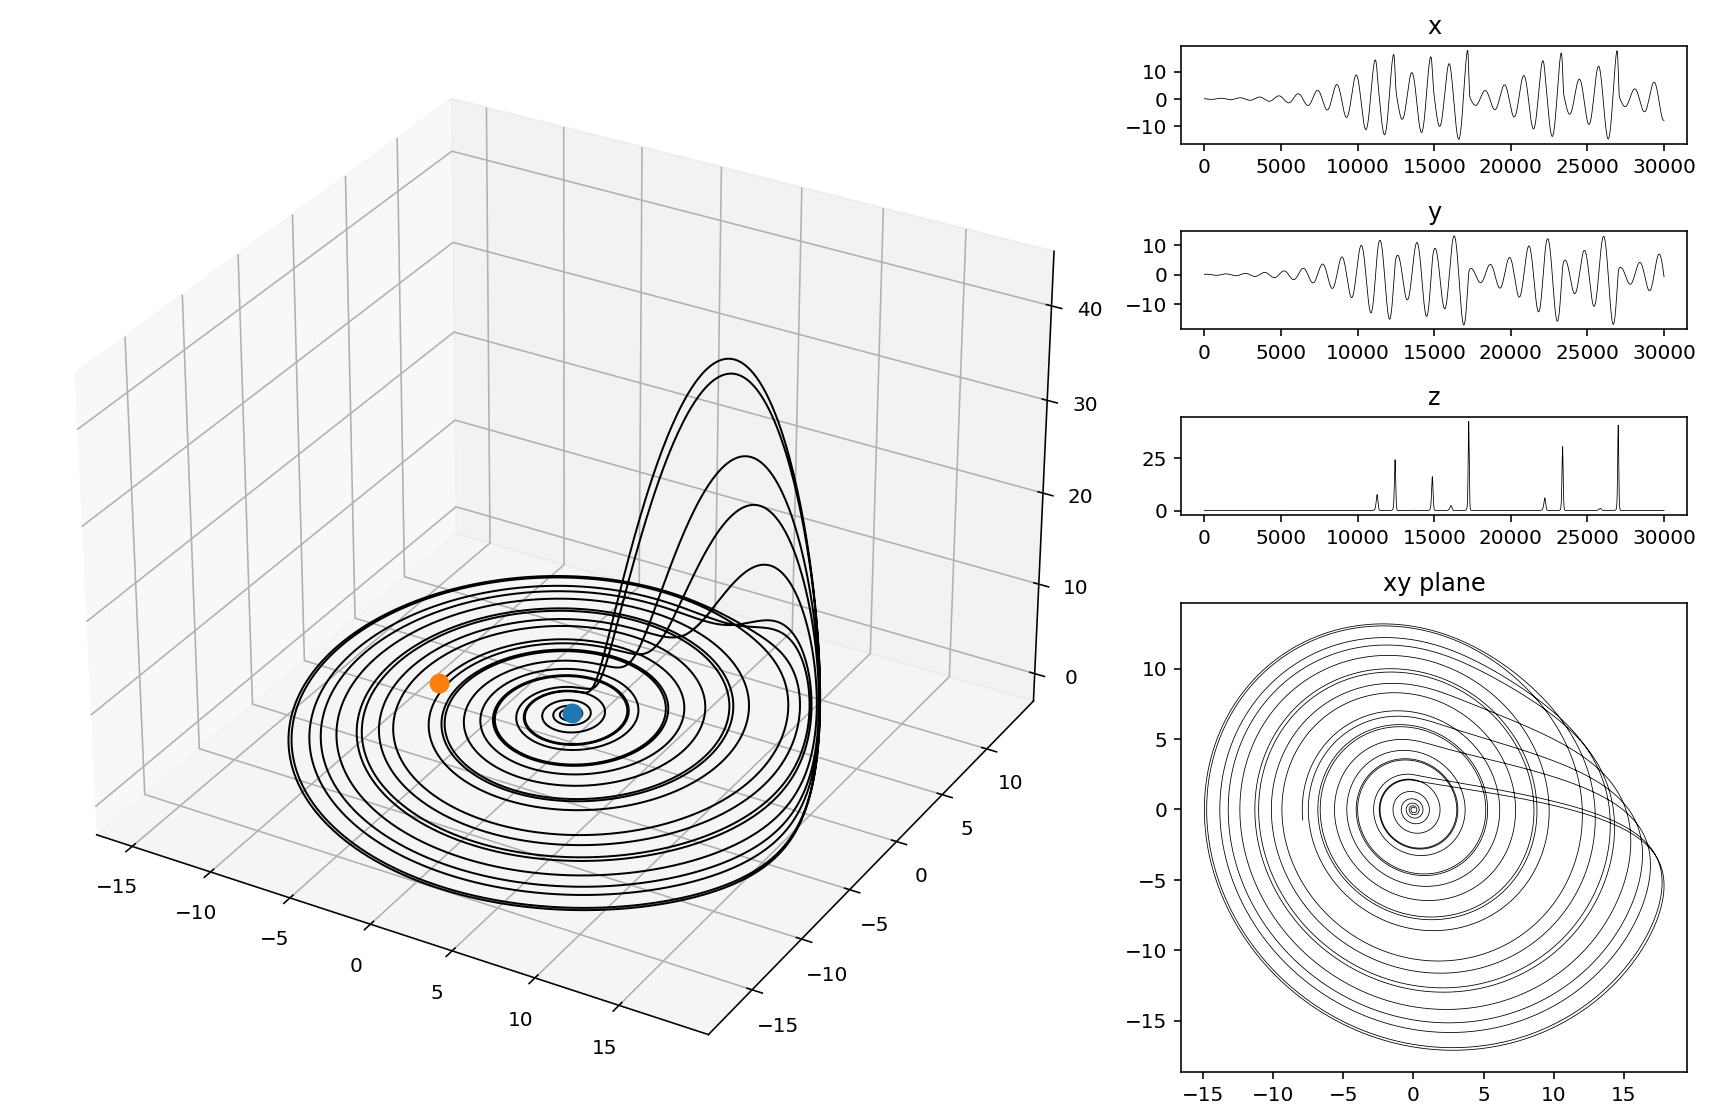

In [5]:
%matplotlib inline
steps = 30000
h = 0.005
X = np.zeros(shape=(3,steps))
X[:,0] = np.array([0.1,0.1,0.1])
for k in range(1,steps):
    X[:,k] = rk4s(Rossler, h, X[:,k-1])
    
plotSpace3D(X)

### Reduction to 1D

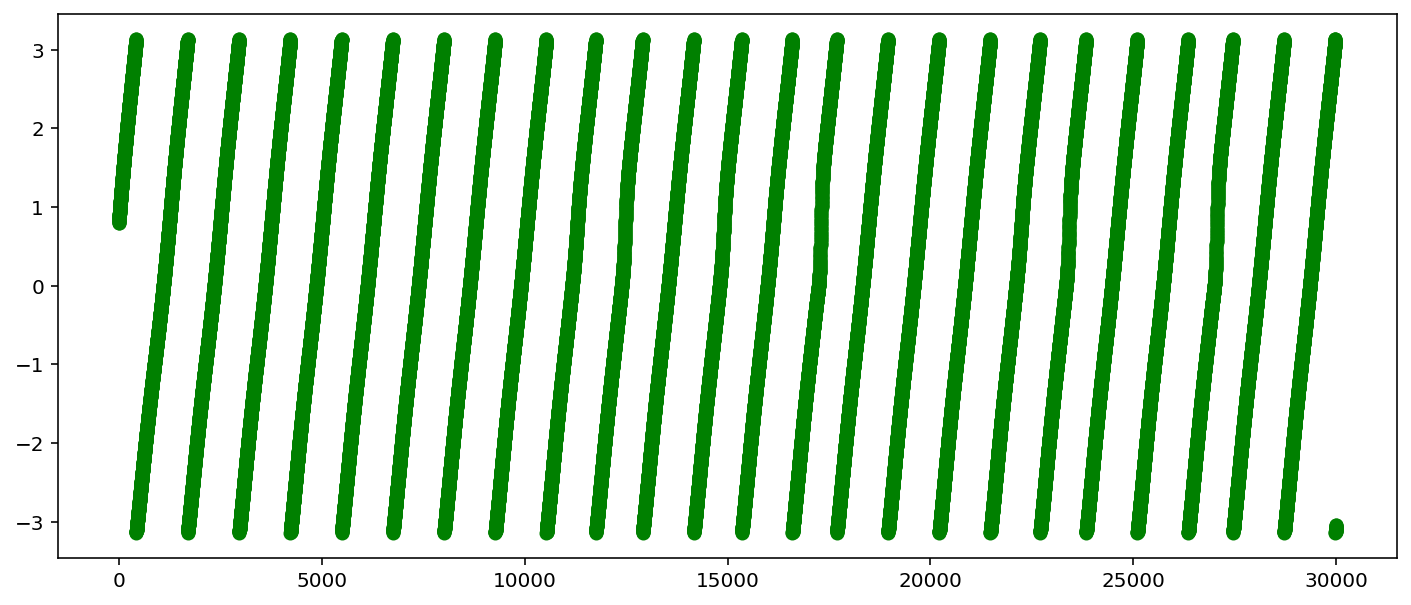

In [6]:
%matplotlib inline
w = np.zeros(steps) 
for k in range(steps):
    w[k] = np.arctan2(X[1,k],X[0,k])
plt.figure(figsize=(12,5))
plt.plot(w,'og');plt.show()

## Phase Synchronization

### Mean-Field Approach

In [7]:
def kuramotoMF(t,theta,r=0,psi=0, alpha=0):
    dtheta = omega + r*alpha*np.sin(psi-theta)
    return dtheta
def r_psi(theta):
    rho = np.sum(np.exp(1j*theta))/len(theta)
    return np.abs(rho), np.angle(rho)

Maximum Frequency Difference : 0.45251087928727274
Coupling Strength : 0.6


<IPython.core.display.Javascript object>


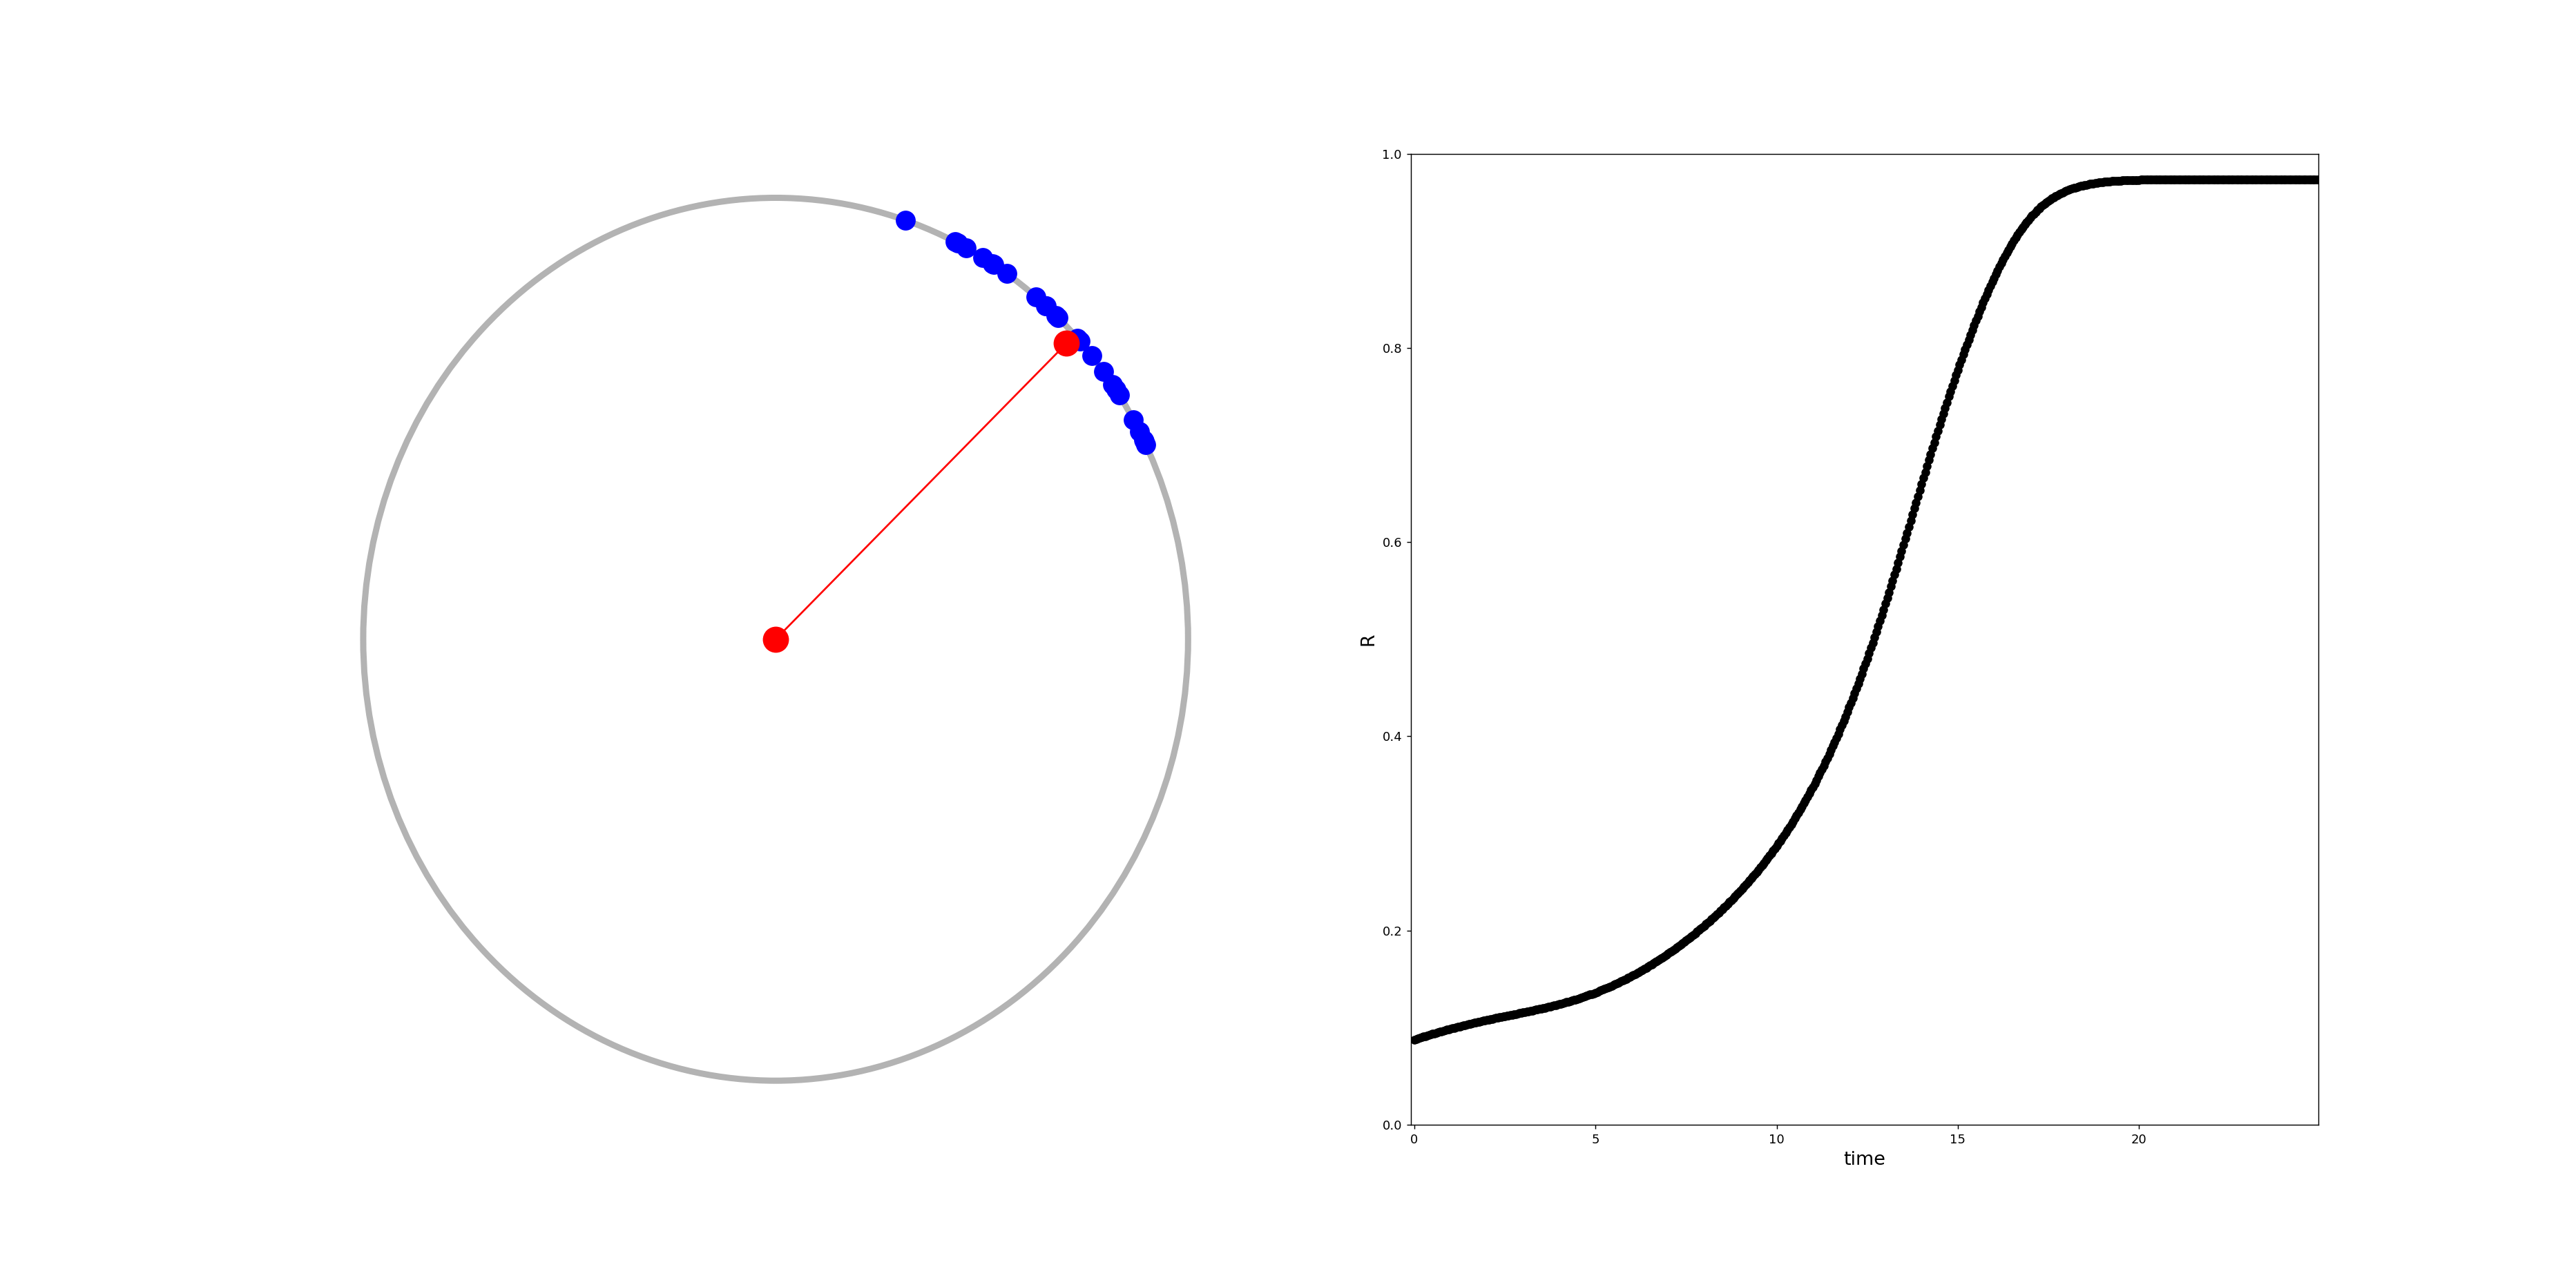

In [8]:
%matplotlib notebook

N = 25
steps = 500
h = 0.05

d_omega = 0.5
omega = 0.5 + d_omega*np.random.random(N)

d_theta = 2 * np.pi
theta = d_theta/2 + np.random.random(N) * d_theta

alpha = 0.6
print('Maximum Frequency Difference :', max(omega)-min(omega))
print('Coupling Strength :',alpha)


fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

plt.ion()
unitCircle = plt.Circle((0,0),1,color='0.7', fill=False,lw=5)
fig.show()
fig.canvas.draw()

for t in range(steps):
    r, psi = r_psi(theta)
    theta = rk5s(kuramotoMF, t, theta, r=r, psi=psi, alpha=alpha)

    ax.clear()
    ax.set_xlim(-1.1,1.1)
    ax.set_ylim(-1.1,1.1)
    ax.add_artist(unitCircle)
    ax.plot(np.cos(theta),np.sin(theta), 'ob', markersize=15)
    ax.plot([0,r*np.cos(psi)],[0,r*np.sin(psi)],'-or', markersize=20)
    ax.axis('off')
    
    ax2.plot(t*h,r,'ko')
    ax2.set_xlabel('time',fontsize=15)
    ax2.set_ylabel('R',fontsize=15)
    ax2.set_xlim(-0.1,t*h)
    ax2.set_ylim(0,1)
    fig.canvas.draw()
    

#### The End...